**Tarea 5: Gabriel Alvarez Castrillo C00368**

**PARTE I: ESPECTRO Y RECONSTRUCCIÓN USANDO FFT (3%)**

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Función para la onda sinusoidal cuadrada que vamos a transformar (la onda cuadrada)
def Onda_Cuadrada(t, f):
    """
    Genera una onda cuadrada a partir de una onda sinusoidal.

    Args:
    ----------
    t : array_like
        Un array de tiempos en los que se evaluará la función sinusoidal.
    f : float
        La frecuencia de la onda cuadrada en Hz.

    Returns:
    -------
    ndarray
        Un array con los valores de la onda cuadrada. Los valores serán +1 o -1, dependiendo 
        del signo de la onda sinusoidal.
    """
    #Usaremos np.sign() ya que es una función de NumPy que devuelve el signo de cada elemento de un array.
    return np.sign(np.sin(2 * np.pi * f * t))

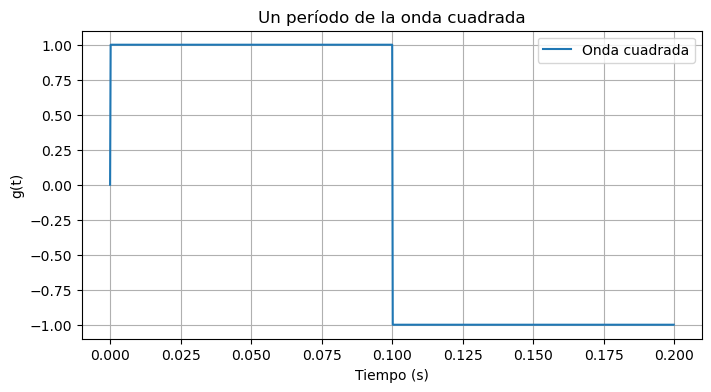

In [51]:
# Definir parámetros
f = 5      # Frecuencia de la señal (Puede ser cualquier valor a elegir, el enunciado no dice nada)
T = 1 / f  # Período de la señal
N = 1000   # Número de puntos de muestreo
t = np.linspace(0, T, N, endpoint=False)  # Tiempo en un periodo
g_t = Onda_Cuadrada(t,f)  # Onda cuadrada

#Creamos la grafica
plt.figure(figsize=(8, 4))
plt.plot(t, g_t, label="Onda cuadrada")
plt.xlabel("Tiempo (s)")
plt.ylabel("g(t)")
plt.title("Un período de la onda cuadrada")
plt.grid()
plt.legend()
plt.show()


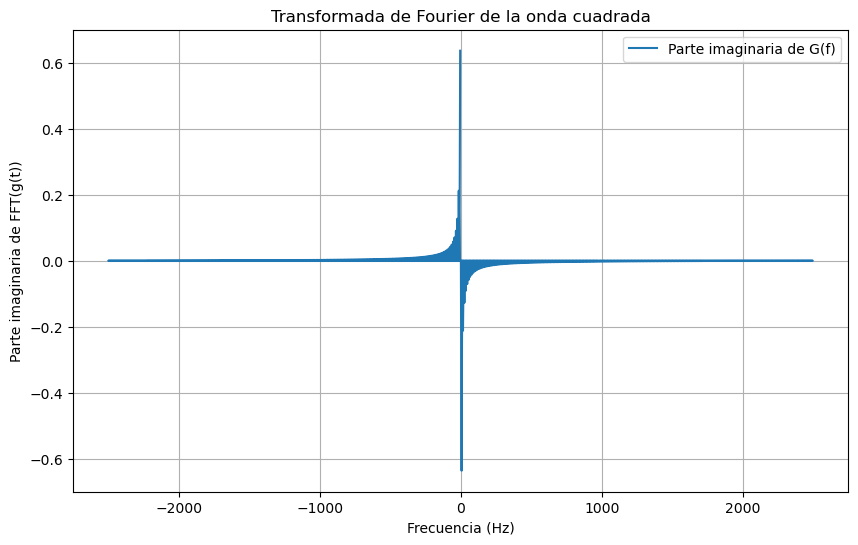

In [52]:
# Ahora para calcular la FFT haremos lo siguiente:
G_f = np.fft.fft(g_t, norm="forward")        # Normalización por el número de puntos
freqs = np.fft.fftfreq(N, d=T/N)             # Ejes de frecuencias

#Creamos la grafica
plt.figure(figsize=(10, 6))
plt.plot(freqs, np.imag(G_f), label="Parte imaginaria de G(f)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Parte imaginaria de FFT(g(t))")
plt.title("Transformada de Fourier de la onda cuadrada")
plt.grid()
plt.legend()
plt.show()

La onda cuadrada oscila entre valores positivos y negativos, lo que provoca que, en promedio, estos se cancelen. Es por eso que se observan los picos cercanos a cero en el espectro.

Los picos positivos corresponden a los **modos de oscilación** en las frecuencias impares (primer armónico, tercer armónico, etc.), los cuales determinan las características principales de la onda cuadrada. La presencia de **armónicos impares** es lo que le da a la onda cuadrada su forma característica, con transiciones abruptas.

Por otro lado, los picos negativos reflejan la **simetría** de la onda cuadrada, pero no afectan directamente la forma de la señal reconstruida.


In [53]:
# Función para la reconstrucción usando la fórmula explícita de la DFT inversa
def reconstruct_signal(c_k, k, N):
    """
    Reconstruye una señal utilizando los primeros k términos de la Transformada Discreta de Fourier (DFT) inversa.

    Args:
    ----------
    c_k : numpy.ndarray
        Array de coeficientes de la DFT de la señal, donde cada elemento corresponde a un coeficiente 
        de frecuencia (conjuntos de frecuencia positiva y negativa).
        
    k : int
        Número de términos a usar en la reconstrucción de la señal (los primeros k coeficientes de la DFT).
        
    N : int
        Número total de puntos en la señal (tamaño de la señal original).

    Returns:
    -------
    numpy.ndarray
        La señal reconstruida en el dominio del tiempo, obtenida a partir de los primeros k coeficientes de la DFT.
    """
    n = np.arange(N)  # Índices de tiempo
    # Reconstrucción usando la suma de los primeros k términos
    y_n = np.sum(c_k[:k] * np.exp(1j * 2 * np.pi * np.outer(n, np.arange(k)) / N), axis=1)
    
    return np.real(y_n)  # Tomamos solo la parte real de la reconstrucción


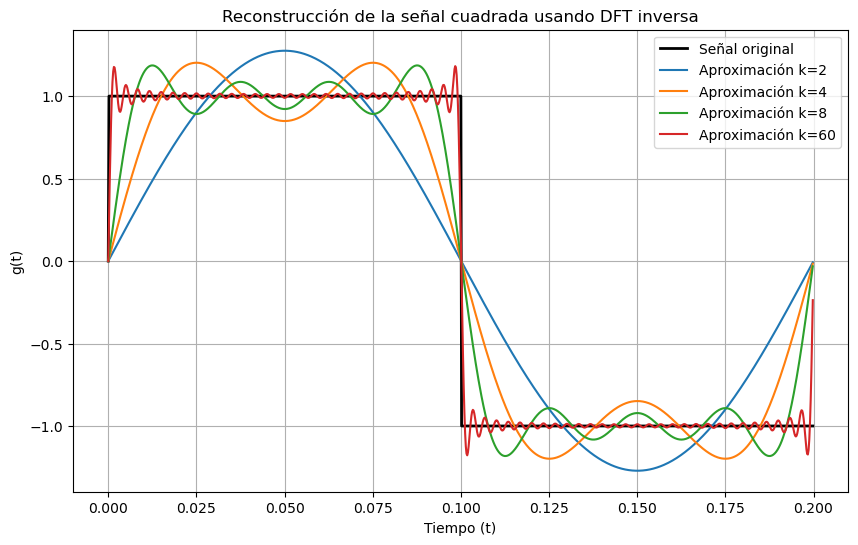

In [54]:
# Calculamos la DFT de la señal
G_f = np.fft.fft(g_t, norm="forward") # DFT normalizada
G_f_half = np.copy(G_f)               # Hacemos un deep copy
G_f_half[freqs < 0] = 0               # Eliminar la parte negativa
G_f_half *= 2 # Duplicamos la parte positiva para compensar la energía perdida y porque la onda es simetrica

# Valores de k para las aproximaciones
k_values = [2, 4, 8, 60]

# Graficamos la señal original y las aproximaciones reconstruidas
plt.figure(figsize=(10, 6))
# Señal original
plt.plot(t, g_t, label="Señal original", color="black", linewidth=2)
# Aproximaciones para diferentes valores de k
for k in k_values:
    g_t_reconstructed = reconstruct_signal(G_f_half, k, N)
    plt.plot(t, g_t_reconstructed, label=f"Aproximación k={k}")
plt.xlabel("Tiempo (t)")
plt.ylabel("g(t)")
plt.title("Reconstrucción de la señal cuadrada usando DFT inversa")
plt.legend()
plt.grid(True)
plt.show()

### Conclusión

- **Aproximación con pocos términos** (`k` pequeño): La reconstrucción es suave y pierde los saltos abruptos de la onda cuadrada original, pero aún conserva la forma general con las frecuencias bajas.

- **Aproximación con muchos términos** (`k` grande): La señal reconstruida se acerca mucho más a la forma original, recuperando detalles y transiciones abruptas.

En resumen, al aumentar el valor de \( k \), la aproximación de la señal se vuelve más precisa. Los valores bajos de \( k \) (como \( k = 2 \)) capturan solo los componentes más importantes de la señal, mientras que valores mayores de \( k \) (como \( k = 60 \)) permiten reconstruir con mayor detalle, especialmente en las transiciones abruptas y las oscilaciones finas de la señal.


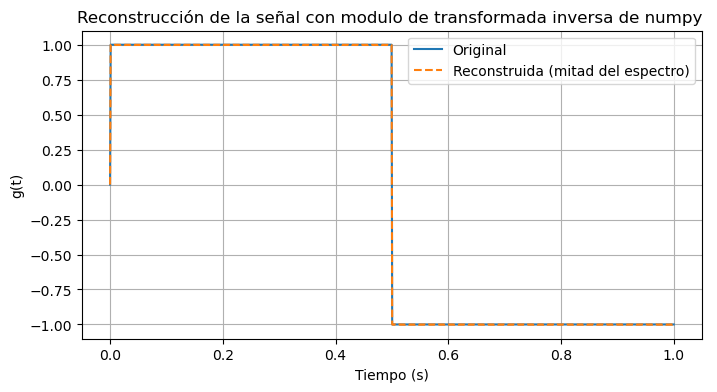

In [ ]:
# Extra
# Reconstrucción con la mitad del espectro pero usando directamente el modulo de transformada inversa de numpy
G_f_half = np.copy(G_f)  # Hacemos un deep copy
G_f_half[freqs < 0] = 0  # Eliminar la parte negativa
G_f_half *= 2 # Duplicamos la parte positiva para compensar la energía perdida y porque la onda es simetrica
g_t_reconstructed = np.fft.ifft(G_f_half*N).real  # Transformada inversa

# Graficamos la señal reconstruida
plt.figure(figsize=(8, 4))
plt.plot(t, g_t, label="Original")
plt.plot(t, g_t_reconstructed, linestyle="dashed", label="Reconstruida (mitad del espectro)")
plt.xlabel("Tiempo (s)")
plt.ylabel("g(t)")
plt.title("Reconstrucción de la señal con modulo de transformada inversa de numpy ")
plt.grid()
plt.legend()
plt.show()

**PARTE II: ECUACIONES ELÍPTICAS (3%)**

In [ ]:
import numpy as np
# Usando la rutina exacta hecha por el profesor...

# Esta función toma como argumentos el tamaño lineal de la grilla cuadrada,
# el valor del voltaje en la sección superior de la grilla y la tolerancia de convergencia 
def jacobi_relaxation(M, V, tolerance):
    # Primero creamos los arreglos 2-dimensionales de la grilla
    # Vamos a necesitar dos según la regla de Jacobi
    # Note que usamos M+1, debido a que debemos contener la condición de frontera
    # phi contiene inicialmente los valores iniciales. Vamos a utilizar ceros.
    phi = np.zeros((M+1, M+1), dtype=float)
    
    # Ahora tenemos que colocar la condición inicial.
    # Recuerde accesos de listas en np.ndarray
    # Ahora colocamos las condiciones de frontera de los bordes
    phi[0, :]  = 0 
    phi[M, :]  = 0  
    phi[:, 0]  = 0
    phi[:, M]  = 0
    # Estas  conds. iniciales realmente no hacian falta en este caso porque ya phi se inicializo en 0, pero es importante para generalizar
    
    # Ahora modelamos las placas del capacitor
    
    # Definimos las posiciones de las placas
    placa_1 = int(2 * M / 10)  # 2 cm en 10 cm, convertido a escala de la grilla
    placa_2 = int(8 * M / 10)  # 8 cm en 10 cm, convertido a escala de la grilla
    
    # Fun fact, el llenado de la grilla invierte los ejes xy
    
    # Placa Izquierda 
    phi[placa_1:placa_2, placa_1] = V  
    
    # Placa Derecha 
    phi[placa_1:placa_2, placa_2] = -1.0*V 

    # phiprime se necesita para la iteración
    phiprime = np.zeros((M+1, M+1), dtype=float)
    # Iteración de Jacobi
    delta = 1.0
    its = 0
    while delta > tolerance:
        # Calculamos la iteración
        its += 1
        for i in range(M+1):
            for j in range(M+1):
                # Condición de frontera
                if i == 0 or i == M or j == 0 or j == M:
                    phiprime[i, j] = phi[i, j]
                # Iteración principal
                else:
                    #COMPLETE AQUÍ
                    phiprime[i,j] = 0.25*(phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1])
        # Calculamos la diferencia máxima con respecto a los valores anteriores
        delta = np.max(np.abs(phi - phiprime))
        # Ahora intercambiamos los arreglos para la nueva iteración
        # El nuevo phi es el phiprime
        temp = phi
        phi = phiprime
        # El nuevo phiprime es el phi viejo
        phiprime = temp
    return phi, its

In [137]:
jacobi_vals, iterations = jacobi_relaxation(M=100, V=1.0, tolerance=1e-5)
iterations

2627

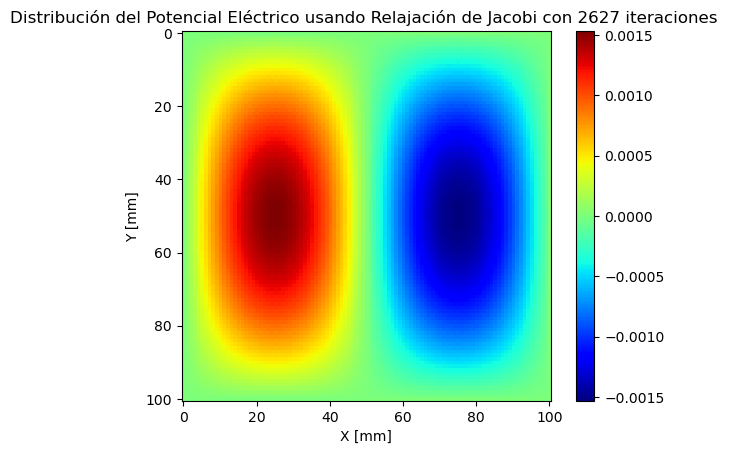

In [144]:
import matplotlib.pyplot as plt

plt.imshow(jacobi_vals)
plt.colorbar()  
plt.jet()
plt.title("Distribución del Potencial Eléctrico usando Relajación de Jacobi con 2627 iteraciones ")
plt.xlabel("X [mm]")
plt.ylabel("Y [mm]")
plt.show()
